In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
import time
import openslide_generator
import importlib
importlib.reload(openslide_generator)

<module 'openslide_generator' from '/Users/quolc/pathology/chainerSVS/kerasrepo/openslide_generator.py'>

## various fetching modes

In [13]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256)

loaded 4 slide(s).
[0] desert1.tif
- 2 regions
- 22539142.5 px2
- patch scale: 300
- fetch probability (area mode): 0.8221004706872871
[1] desert2.tif
- 2 regions
- 7971891.0 px2
- patch scale: 450
- fetch probability (area mode): 0.08507918352003883
[2] desert2.tif
- 1 regions
- 2209921.0 px2
- patch scale: 300
- fetch probability (area mode): 0.04641017289633699
[3] desert2.tif
- 1 regions
- 2209921.0 px2
- patch scale: 300
- fetch probability (area mode): 0.04641017289633699
there are total 6 regions.
patches per epoch is set to 337.



In [14]:
# gen_train.fetch_mode = 'area'
# gen_train.fetch_mode = 'slide'
# gen_train.fetch_mode = 'label'
gen_train.fetch_mode = 'label-slide'
gen_train.reset_fetch_count()

In [15]:
t_start = time.time()
positions = dict()
for i in range(1000):
    if i % 100 == 0:
        print(i)
    _, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    if not slide_id in positions:
        positions[slide_id] = []
    positions[slide_id].append((posx, posy, label))
print(time.time() - t_start)

0
100
200
300
400
500
600
700
800
900
12.525459051132202


In [16]:
gen_train.total_loop_count

1336

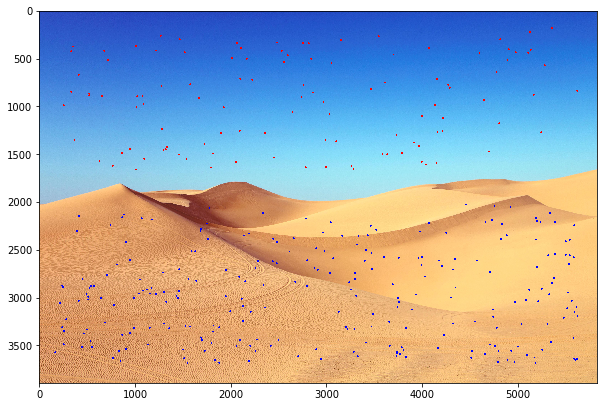

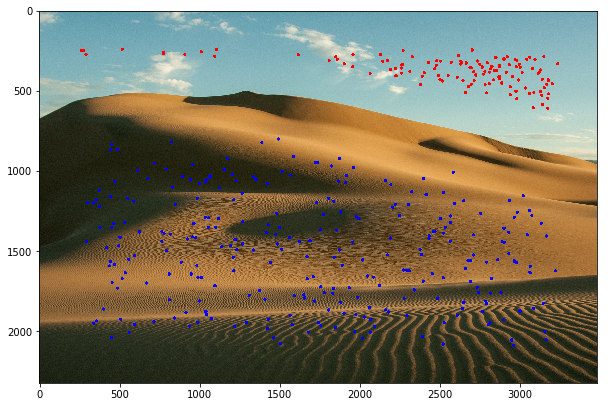

In [17]:
import cv2

images = ['./test_slides/desert1.jpg', './test_slides/desert2.jpg']

for i, filename in enumerate(images):
    image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    for posx, posy, label in positions[i]:
        if label == 0:
            cv2.circle(image, (int(posx), int(posy)), 10, (255,0,0), -1)
        else:
            cv2.circle(image, (int(posx), int(posy)), 10, (0,0,255), -1)

    plt.figure(figsize=(10,10))
    plt.imshow(image)

In [18]:
gen_train.fetch_count

[[110, 256], [126, 277], [112], [119]]

## bluring

In [22]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256,
        blur=50, verbose=0)

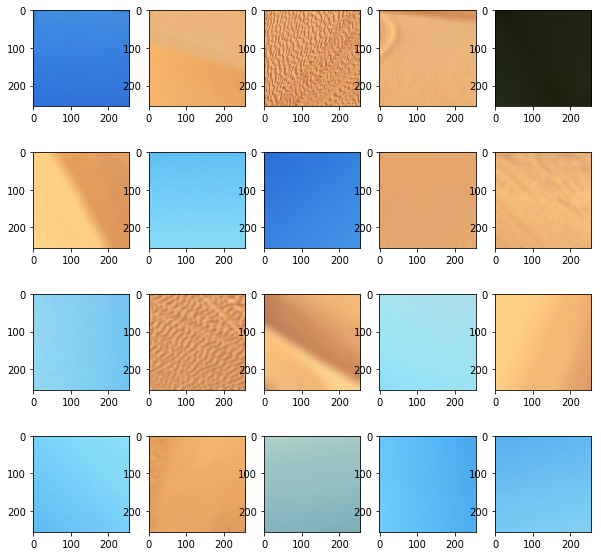

In [23]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))

## H&E and scale augmentation

In [24]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256,
        he_augmentation=True, scale_augmentation=True,
        verbose=0)
gen_train.fetch_mode = 'slide'

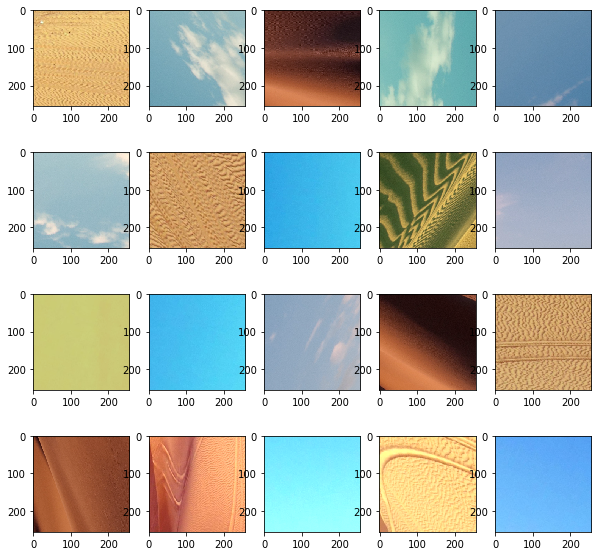

In [25]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))

## color transfer

In [29]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256,
        color_matching='color_matching_test.jpg',
        verbose=0)
gen_train.fetch_mode = 'slide'

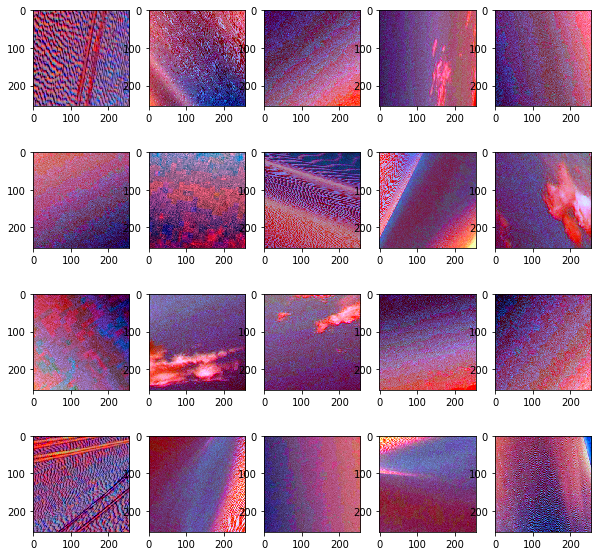

In [30]:
plt.figure(figsize=(10,10))
for i in range(20):
    image, label, (slide_id, region_id, posx, posy) = gen_train.get_example(i)
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))

## get_examples_of_slide_label

In [33]:
gen_train = openslide_generator.OpenSlideGenerator(
        './train.txt', './test_slides', 512, 256, verbose=0)

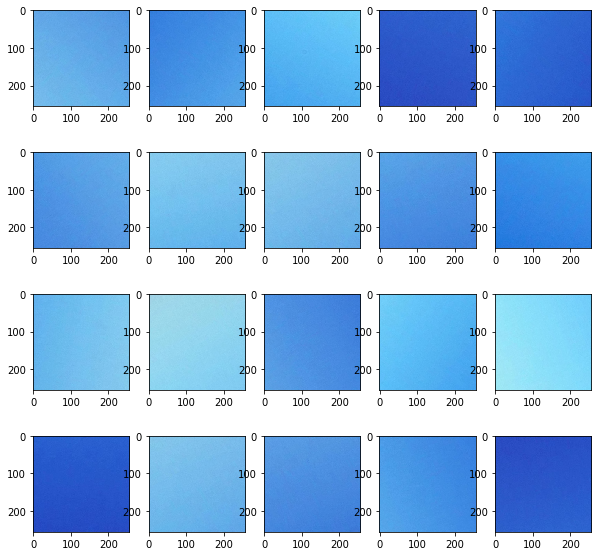

In [36]:
plt.figure(figsize=(10,10))
for i, image in enumerate(gen_train.get_examples_of_slide_label(slide_id=0, label=0, count=20)):
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))

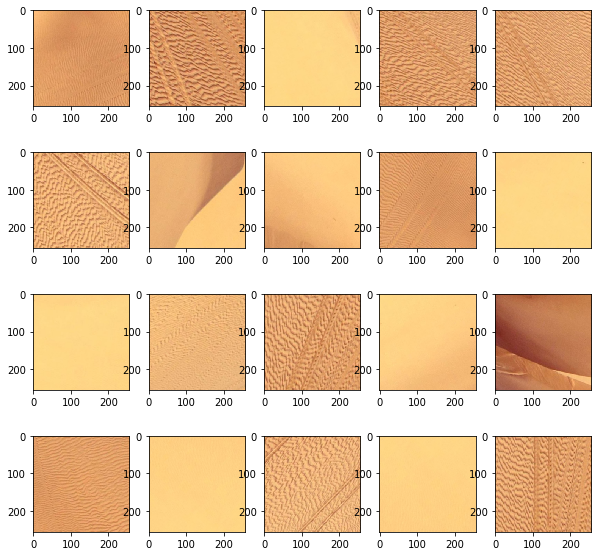

In [37]:
plt.figure(figsize=(10,10))
for i, image in enumerate(gen_train.get_examples_of_slide_label(slide_id=0, label=1, count=20)):
    plt.subplot(4,5,i+1)
    plt.imshow(image.transpose(1,2,0))